In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
DF = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"+"processed.cleveland.data", 
                 header=None,
                na_values="?")

In [3]:
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
DF = DF.dropna(axis=0)
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [5]:
names =["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num" ]

In [6]:
DF.columns = names

In [7]:
X = DF.thalach.to_numpy()

In [8]:
Y = np.array([1 if x > 0 else 0 for x in DF.num])

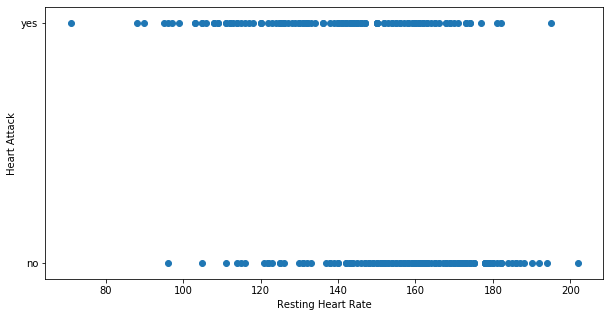

In [9]:
plt.scatter(X,Y)
plt.xlabel("Resting Heart Rate")
plt.ylabel("Heart Attack")
plt.yticks([0,1],["no","yes"]);
plt.gcf().set_size_inches(10,5)

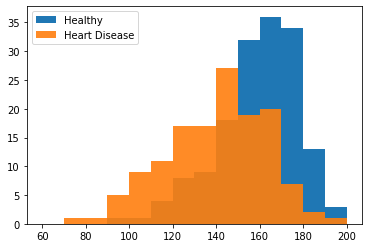

In [10]:
bins = np.linspace(60,200,15)
zeros = plt.hist(X[Y==0],bins=bins,label="Healthy")
ones = plt.hist(X[Y==1],bins=bins,alpha=0.9,label="Heart Disease")
plt.legend()

In [11]:
BINCENTERS = 0.5*(bins[:-1]+bins[1:])

(-0.2, 1.2)

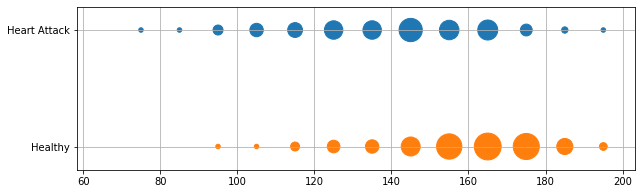

In [12]:
plt.scatter(BINCENTERS, len(BINCENTERS)*[1], s=20*ones[0])
plt.scatter(BINCENTERS, len(BINCENTERS)*[0], s=20*zeros[0])
plt.gcf().set_size_inches(10,3)
plt.grid()
plt.yticks([0,1],["Healthy","Heart Attack"])
plt.ylim([-.2,1.2])

In [13]:
X = X.reshape(-1,1)

In [14]:
model =LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [15]:
model.fit(xtrain, ytrain)


LogisticRegression()

In [16]:
yp = model.predict(xtest)

In [17]:
accuracy_score(ytest,yp)

0.7066666666666667

In [18]:
ACCS=[]
for j in range(25):
    model = LogisticRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    model.fit(xtrain, ytrain)
    yp = model.predict(xtest)
    ACCS.append(accuracy_score(ytest,yp))

Text(0.5, 1.0, 'Accuracy for Thalach')

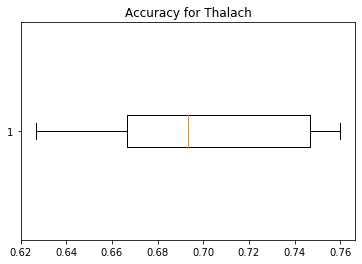

In [19]:
plt.boxplot(ACCS,vert=False);
plt.title("Accuracy for Thalach")

In [20]:
from sklearn.model_selection import cross_validate

In [21]:
cross_validate(LogisticRegression(),X,Y,cv=10)

{'fit_time': array([0.00500822, 0.00508833, 0.00511599, 0.00506568, 0.00466824,
        0.00512743, 0.00449228, 0.00413394, 0.00486088, 0.0040381 ]),
 'score_time': array([0.00029778, 0.00031209, 0.00027514, 0.00030828, 0.0003252 ,
        0.000278  , 0.00024199, 0.00021958, 0.00028706, 0.00022626]),
 'test_score': array([0.66666667, 0.7       , 0.66666667, 0.73333333, 0.86666667,
        0.6       , 0.66666667, 0.79310345, 0.62068966, 0.79310345])}

In [22]:
model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
model.fit(xtrain, ytrain)
a = model.intercept_[0]
b = model.coef_[0,0]
a,b

(6.179595741440292, -0.04178253372009458)

In [23]:
def f(x):
    return (1/(1+np.exp(-(a+b*x))) )

(60, 200)

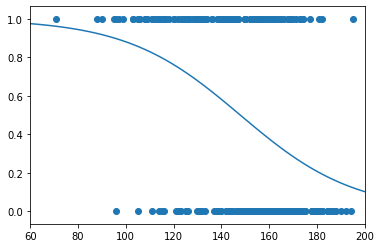

In [24]:
xplot = np.linspace(6,200,100)
yplot = f(xplot)
plt.plot(xplot,yplot)
plt.scatter(X,Y)
plt.xlim(60,200)

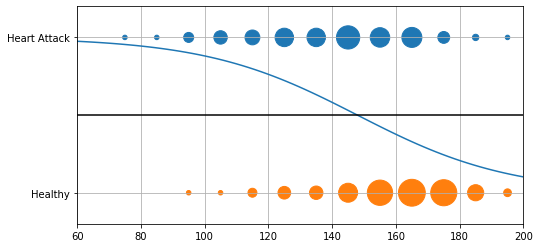

In [25]:
plt.plot(xplot,yplot)
plt.scatter(BINCENTERS, len(BINCENTERS)*[1], s=20*ones[0])
plt.scatter(BINCENTERS, len(BINCENTERS)*[0], s=20*zeros[0])
plt.grid()
plt.yticks([0,1],["Healthy","Heart Attack"])
plt.ylim([-.2,1.2])
plt.xlim([60,200])
plt.plot([60,200],[0.5,0.5], c="k")
plt.plot()
plt.gcf().set_size_inches(8,4)


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
model.fit(xtrain, ytrain)
yp = model.predict(xtest)
confusion_matrix(ytest,yp)

array([[28, 12],
       [12, 23]])